# Import Functions

In [1]:
from functions import *
from sklearn.metrics import mean_squared_error

# Collecting the Data

The *get_data* function below was commented out because it takes over 30 mins to finish. To avoid overwriting the current masterfile, increase the third parameter in the get_data function by 1. (e.g. 11 => 12). The data dictionary for this statcast data can be found [here](https://baseballsavant.mlb.com/csv-docs).

In [2]:
# get_data('2018-04-01','2021-06-15', 11)

# Preprocessing

The line below unpacks the input features for the model and the train test split. The train test split is done in the *preprocessing* function instead of the *model* function so that the other functions can process the model's output without having to run the model. Saved versions of the models can be viewed in .pkl files stored in the 'data' folder.

In [3]:
input_df, X_train, X_test, y_train, y_test = preprocessing(remove_pitches = ['EP', 'KN', 'SC', 'PO', 'CS'])

1527792 pitches
699 unique pitchers


# Modeling Pitch Quality

Over 1.5 million pitches were used to model pitch quality. A Random Forest regression model was used to predict the change in expected runs using the following parameters:

1. pitcher handedness
2. batter handedness
3. horizontal pitch location
4. vertical pitch location
5. horizontal movement
6. vertical movement
7. veloctiy
8. spin rate
9. pitch count (balls and strikes)
10. type of pitch (Fastball, Curveball, etc.)

Below is an example of a running a gridsearch testing hyperparemters for the Random Forest regression model. This code is commented out because it can take several hours to run. Previously saved models are stored in the 'folder' and are loaded in below for further analysis.

In [4]:
# model(4, X_train, y_train,
#       estimators = [75, 100, 125],
#       max_features = [None, 'auto'],
#       max_depth = [2, 3, 4,5],
#       min_sample_split = [3, 4, 5],
#       ccp_alpha = [.001, 0.01, .1])

# Evaluate Model

The *evaluate_model* function below outputs a dataframe of the best models and their respective R^2 scores. Additionaly the final_results_df is created to visualize the the model's predictions in the plotting function below.

In [6]:
model_results_df, final_results_df, y_preds = evaluate_model(3, y_train, y_test, X_test)

model_results_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,126.582324,4.612613,0.557109,0.013352,4,None,3,100,"{'max_depth': 4, 'max_features': None, 'min_sa...",0.015277,0.014424,0.015015,0.016231,0.014744,0.015138,0.000616,3
1,124.394722,0.504037,0.561255,0.010178,4,auto,3,100,"{'max_depth': 4, 'max_features': 'auto', 'min_...",0.015287,0.014436,0.015033,0.016185,0.014742,0.015137,0.000596,4
2,156.222698,0.196714,0.686543,0.009036,5,None,3,100,"{'max_depth': 5, 'max_features': None, 'min_sa...",0.019106,0.018118,0.018380,0.020315,0.018250,0.018834,0.000816,1


In [7]:
final_results_df.head()

,release_speed,release_spin_rate,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,pitch_type_CU,pitch_type_FA,...,pitch_type_FF,pitch_type_FS,pitch_type_FT,pitch_type_KC,pitch_type_SI,pitch_type_SL,p_throws_R,stand_R,predictions,y_actual
544077,93.9,1805.0,1,0,-0.72,0.92,0.60,2.77,0,0,...,1,0,0,0,0,0,1,1,-0.016176,-0.044
363649,92.6,2173.0,1,0,-0.67,1.47,0.15,1.22,0,0,...,1,0,0,0,0,0,1,1,0.040858,0.051
1434588,90.7,2179.0,0,0,-1.34,0.92,0.73,1.80,0,0,...,0,0,0,0,1,0,1,1,-0.016176,-0.030
549070,85.2,2997.0,0,0,1.06,-0.20,-0.13,2.70,0,0,...,0,0,0,0,0,1,1,0,-0.016176,-0.071
853762,88.5,2575.0,3,2,0.43,0.71,1.24,2.19,0,0,...,0,0,0,0,0,1,1,1,0.077669,0.000


In [8]:
## Baseline RMSE
baseline_test_preds = [y_train.mean()]*len(y_test)
print(f'Baseline Mean Squared Error {mean_squared_error(y_true = y_test, y_pred = baseline_test_preds)**0.5}')

# Model RMSE is marginally better than the baseline
print(f'y_test Mean Squared Error {mean_squared_error(y_true = y_test, y_pred = y_preds)**0.5}')

Baseline Mean Squared Error 0.24050744785992337
y_test Mean Squared Error 0.23826497444385403


# Render Plots
*Only Render one pitch at a time due to memory constraints.*

In [18]:
 pitch_types = [#'pitch_type_CU',
#                'pitch_type_FA',
#                'pitch_type_FC',
               'pitch_type_FF',
#                'pitch_type_FS',
#                'pitch_type_FT',
#                'pitch_type_KC',
#                'pitch_type_SI',
#               'pitch_type_SL'
              ]

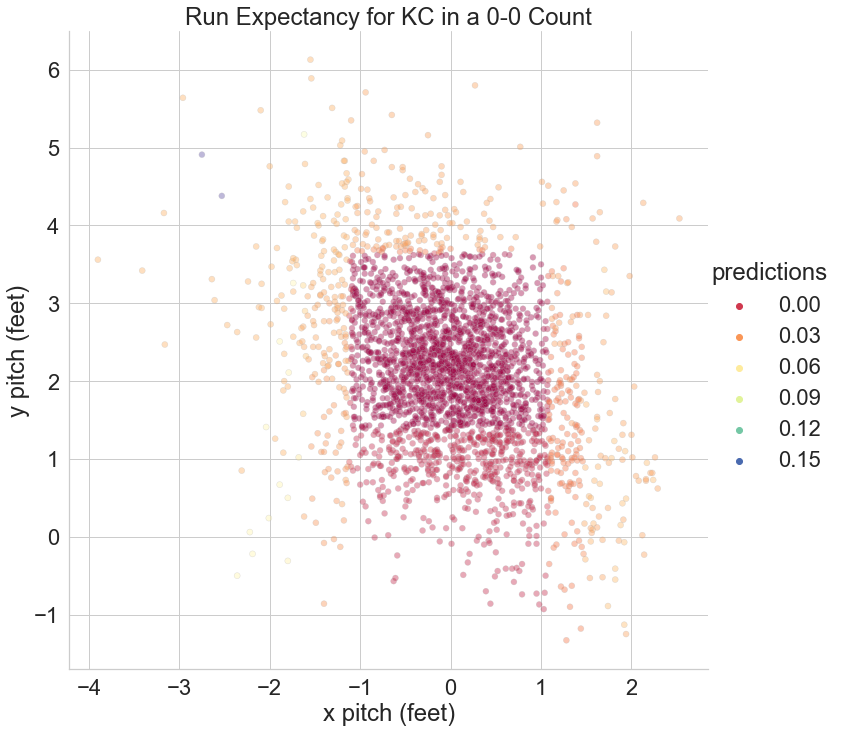

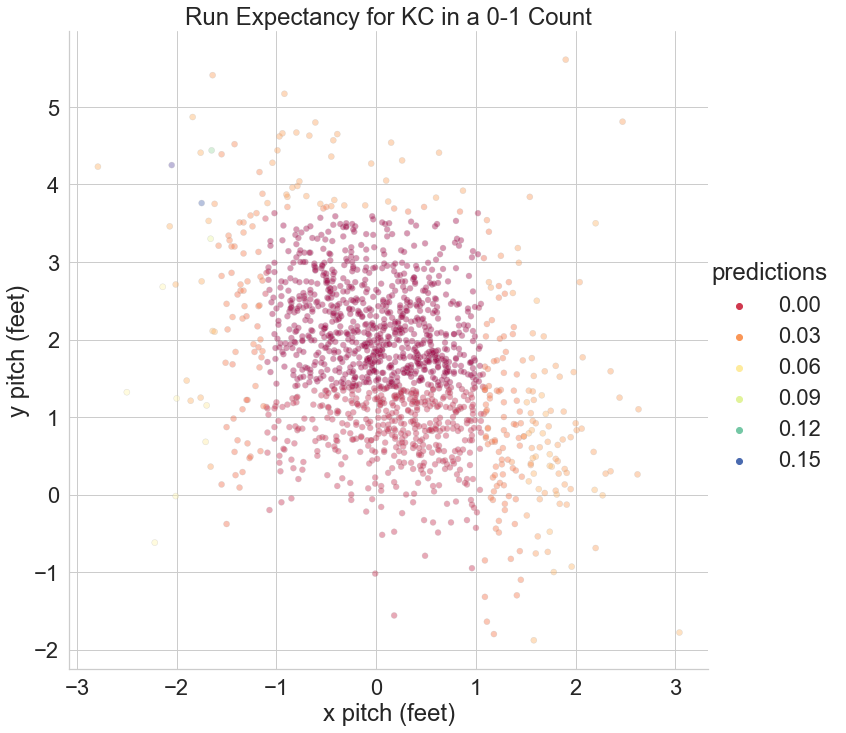

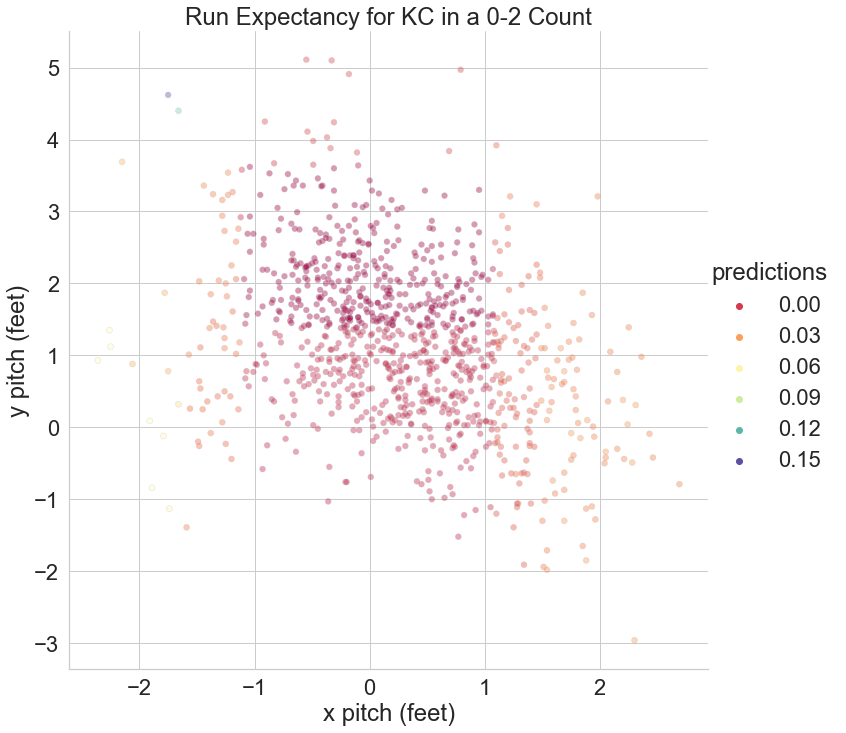

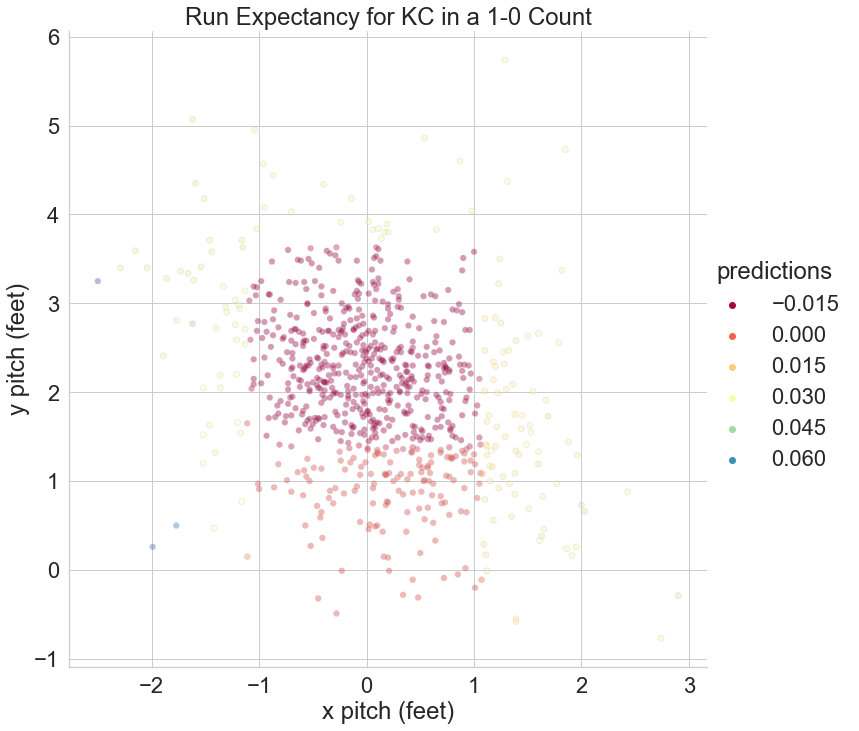

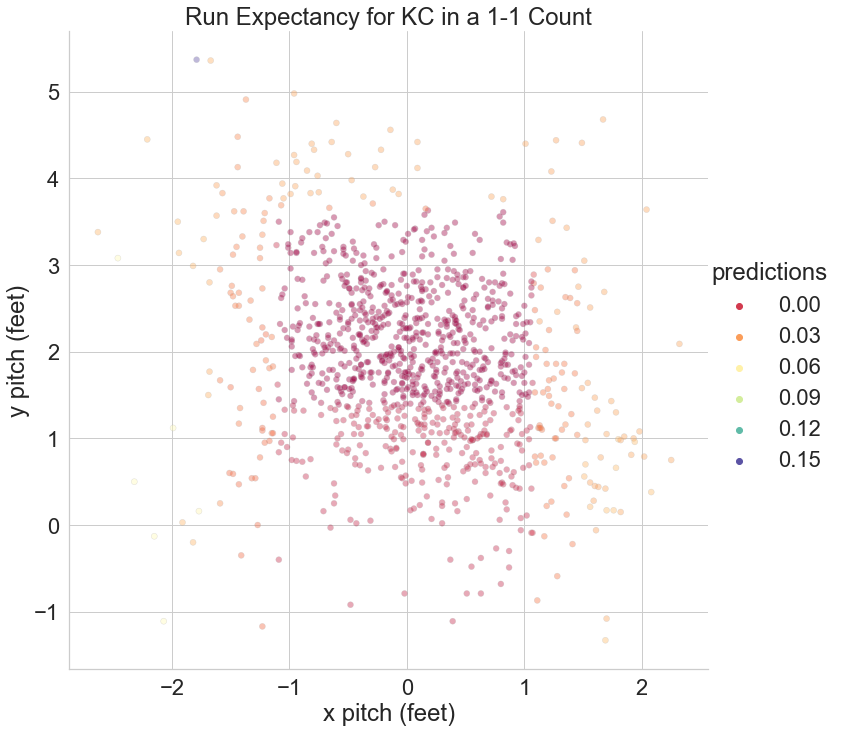

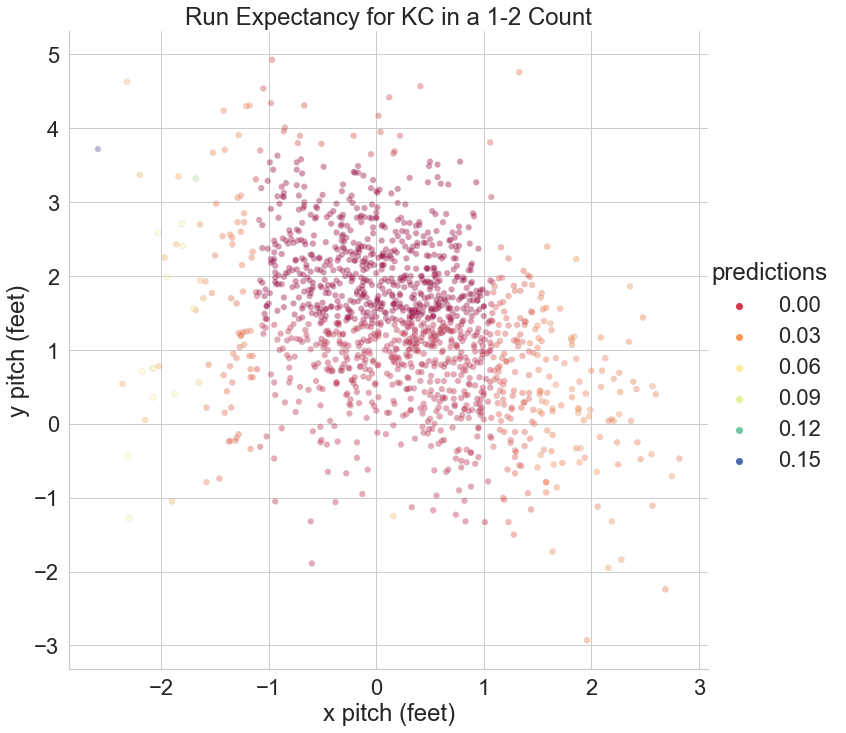

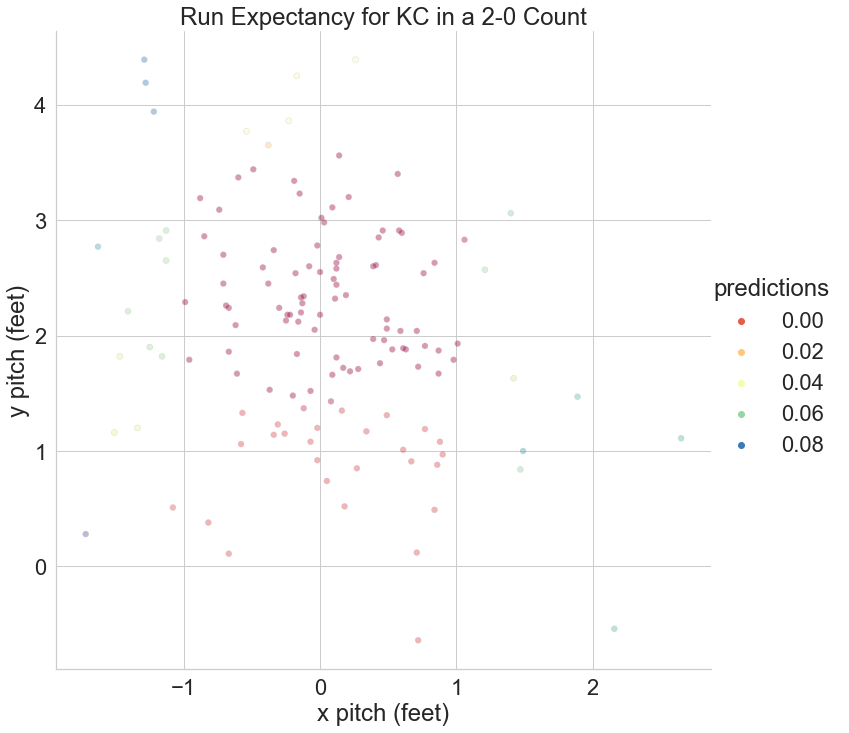

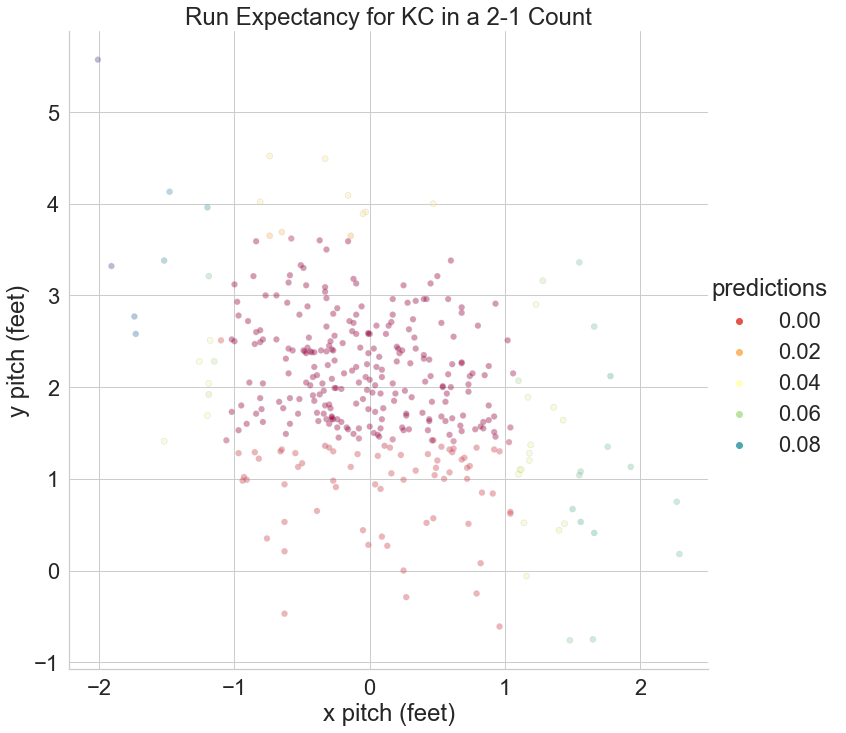

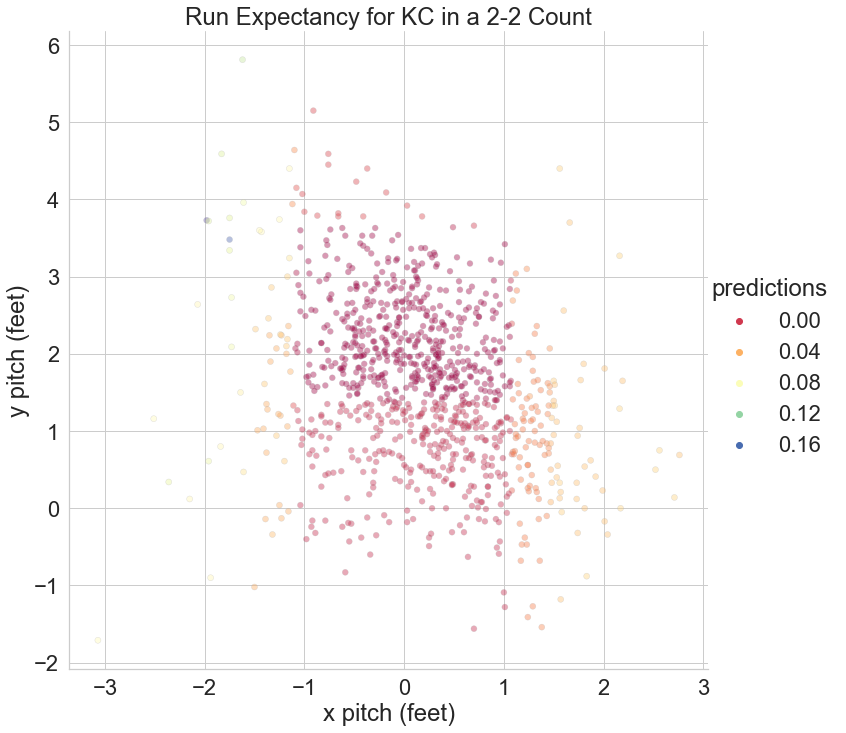

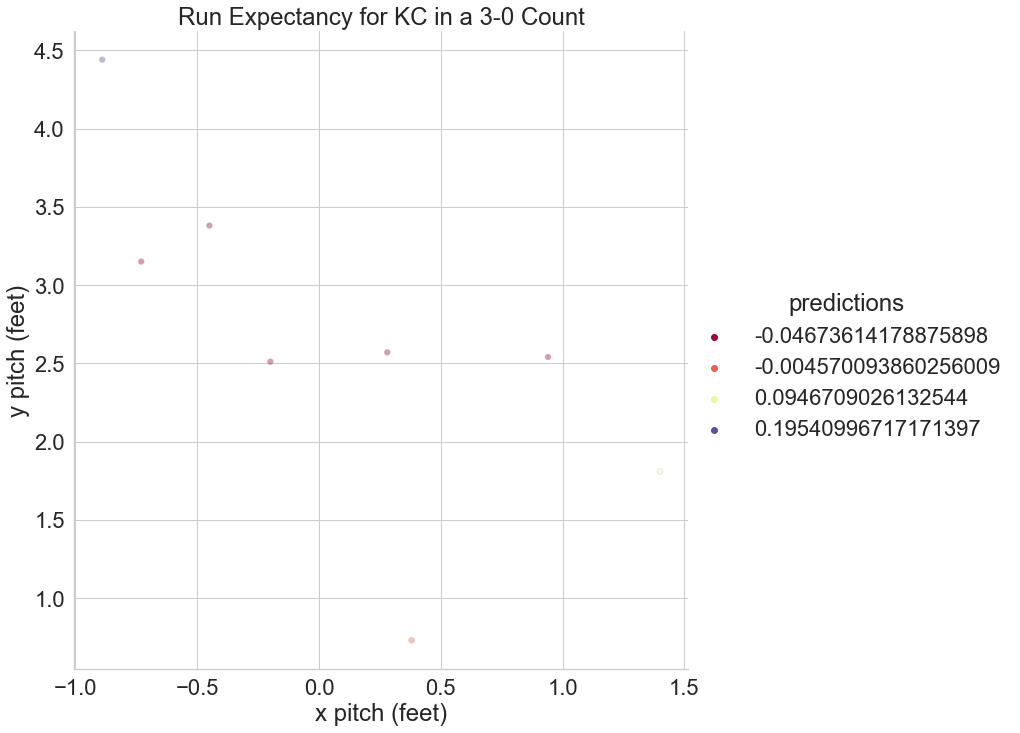

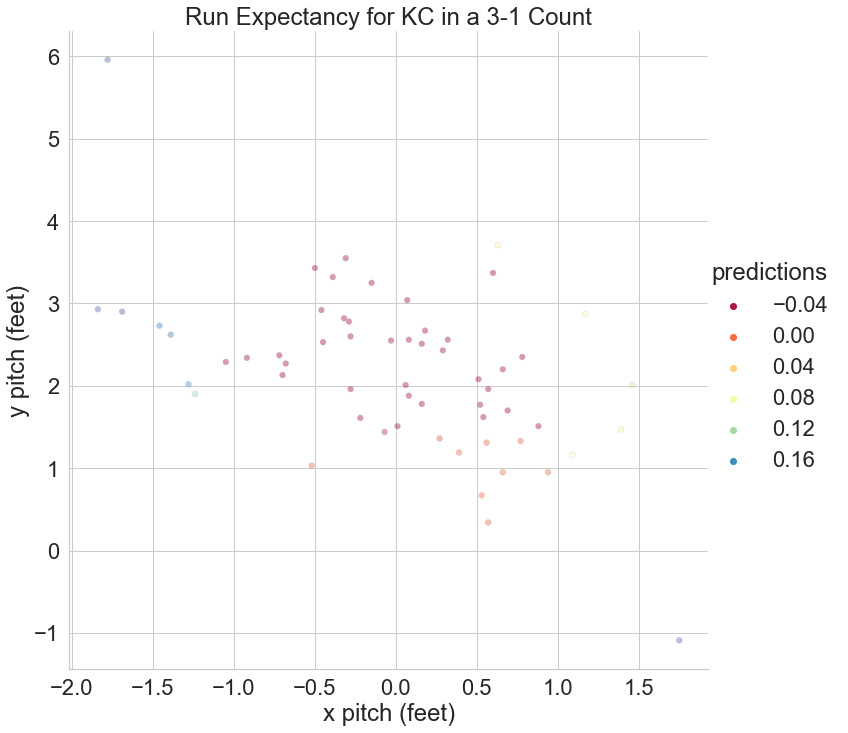

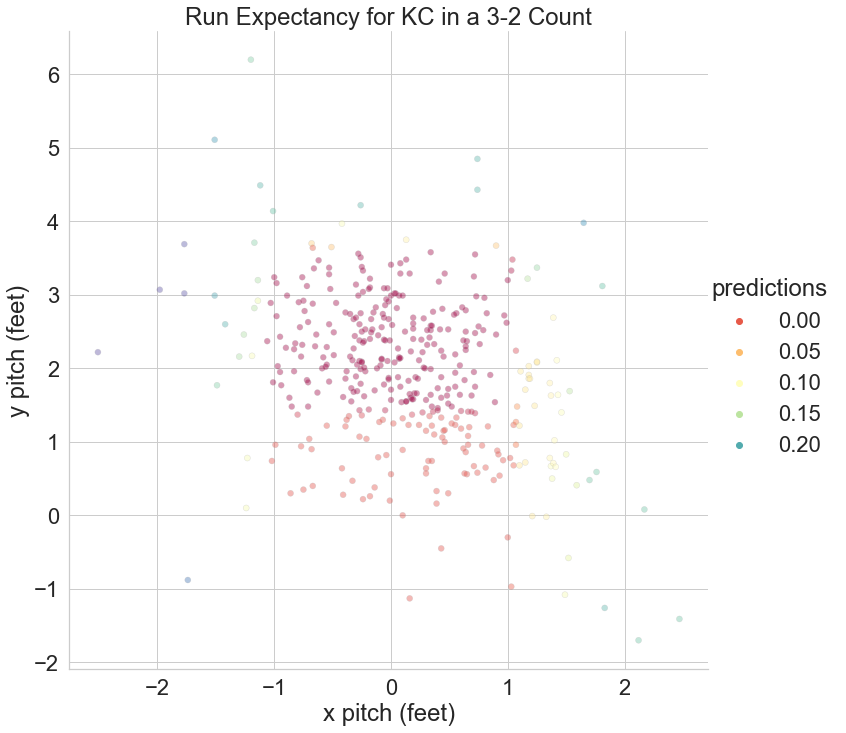

In [17]:
for ball in range(4):
    for strike in range(3):
        for pitch in pitch_types:
            pitch_plots(final_results_df, ball, strike, pitch)